In [1]:
import numpy as np
from lab1 import get_projection_matrix, factor
np.set_printoptions(linewidth=1000, precision=4)

In [2]:
pts_2d = np.loadtxt('data/task12/pts2d-norm-pic_a.txt')
pts_3d = np.loadtxt('data/task12/pts3d-norm.txt')

In [3]:
pts_2d

array([[ 1.0486, -0.3645],
       [-1.6851, -0.4004],
       [-0.9437, -0.42  ],
       [ 1.0682,  0.0699],
       [ 0.6077, -0.0771],
       [ 1.2543, -0.6454],
       [-0.2709,  0.8635],
       [-0.4571, -0.3645],
       [-0.7902,  0.0307],
       [ 0.7318,  0.6382],
       [-1.058 ,  0.3312],
       [ 0.3464,  0.3377],
       [ 0.3137,  0.1189],
       [-0.431 ,  0.0242],
       [-0.4799,  0.292 ],
       [ 0.6109,  0.083 ],
       [-0.4081,  0.292 ],
       [-0.1109, -0.2992],
       [ 0.5129, -0.0575],
       [ 0.1406, -0.4527]])

In [4]:
x = get_projection_matrix(pts_3d, pts_2d)

In [5]:
x*-0.5968

array([[-0.4583,  0.2947,  0.014 , -0.004 ],
       [ 0.0509,  0.0546,  0.541 ,  0.0524],
       [-0.109 , -0.1783,  0.0443, -0.5968]])

In [6]:
K, R, T, C = factor(x)

In [7]:
K

array([[ 0.9131,  0.0022, -0.0156],
       [ 0.    ,  0.9126,  0.068 ],
       [ 0.    ,  0.    ,  0.358 ]])

In [8]:
R

array([[ 0.85  , -0.5262, -0.0268],
       [-0.1314, -0.1625, -0.9779],
       [ 0.5102,  0.8347, -0.2072]])

In [9]:
T

array([ 0.0559, -0.3044,  2.7933])

In [10]:
C

array([-1.5126, -2.3517,  0.2827])

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
M=x

In [12]:
pts_2d_calculated = M[:, None, :].dot(np.hstack((pts_3d, np.ones((20, 1)))).T)[:,0,:].T

In [13]:
pts_2d_calculated = pts_3d * T

In [14]:
pts_2d_calculated

array([[ 0.0878,  0.0454,  0.7257],
       [-0.0854, -0.2952,  1.062 ],
       [-0.0381, -0.3914,  1.1391],
       [ 0.0231,  0.3106, -0.2556],
       [ 0.0676, -0.0856, -0.3575],
       [ 0.0493,  0.2582,  1.4679],
       [-0.0528,  0.3526, -1.05  ],
       [ 0.0023, -0.4093,  0.905 ],
       [-0.0446, -0.0918, -0.2307],
       [-0.0242,  0.4308, -0.7749],
       [-0.0641,  0.0235, -0.745 ],
       [-0.0288,  0.3588, -0.3913],
       [ 0.0111,  0.0869, -0.5905],
       [-0.0241, -0.0652, -0.2941],
       [-0.0418,  0.1169, -0.6726],
       [ 0.0452,  0.0364, -0.7349],
       [-0.0425,  0.1763, -0.5408],
       [ 0.0181, -0.2426,  0.6061],
       [ 0.0732, -0.1761, -0.5271],
       [ 0.0689, -0.439 ,  1.2587]])

In [13]:
c0 = np.vstack((C, C + R[0,:]))
c1 = np.vstack((C, C - R[1,:]))
c2 = np.vstack((C, C + R[2,:]))

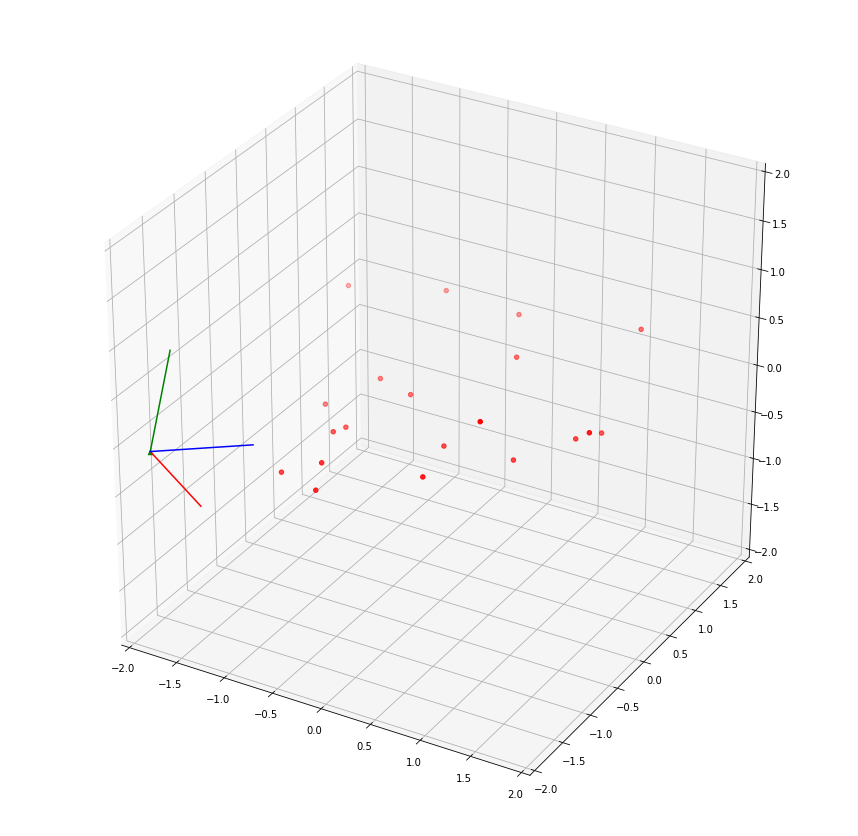

In [16]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_zlim(-2,2)
ax1.scatter(pts_3d[:,0], pts_3d[:,1], pts_3d[:,2], c='r')

# ax1.scatter(pts_2d[:,0], pts_2d[:,1], np.ones((1,20)), c='g')
# ax1.scatter(pts_2d_calculated[:,0], pts_2d_calculated[:,1], pts_2d_calculated[:,2], c='b')
ax1.scatter(C[0], C[1], C[2], c='g', marker='^')
# ax1.scatter(0, 0, 0, c='g', marker='o')
ax1.plot(c0[:,0], c0[:,1], c0[:,2], c='r')
ax1.plot(c1[:,0], c1[:,1], c1[:,2], c='g')
ax1.plot(c2[:,0], c2[:,1], c2[:,2], c='b')